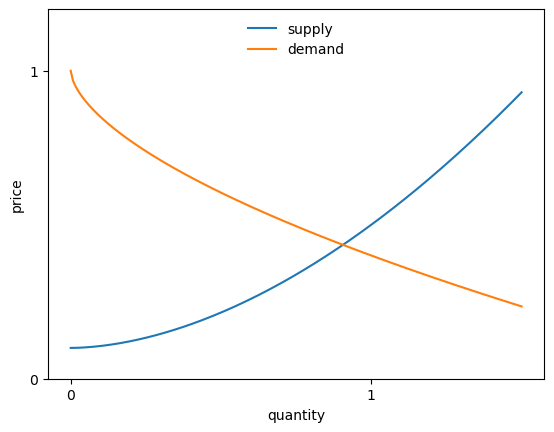

Equilibrium quantity is 0.9056389490133799
Eqilibrium price is 0.43464100588737675


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Market:
    def __init__(self,
                 d_0=1.0 , # demand intercept
                 d_1=0.6 , # demand slope
                 s_0=0.1 , # supply intercept
                 s_1=0.4 ): # supply slope
        self.d_0, self.d_1 = d_0, d_1
        self.s_0, self.s_1 = s_0, s_1
        
    def inverse_demand(self, q):
        return self.d_0 - self.d_1 * q**0.6
    def inverse_supply(self, q):
        return self.s_0 + self.s_1 * q**1.8

market = Market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = market.inverse_supply(q_grid)
demand_curve = market.inverse_demand(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply')
ax.plot(q_grid, demand_curve, label='demand')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

from scipy.optimize import newton
def excess_demand(q):
 return market.inverse_demand(q) - market.inverse_supply(q)

equilibrium_q = newton(excess_demand, 0.99)
equilibrium_p = market.inverse_demand(equilibrium_q)

print("Equilibrium quantity is", equilibrium_q)
print("Eqilibrium price is", equilibrium_p)
